# **API Tesouro Direto**
## **Notebook para Homologação de funcionalidades sobre os dados coletados no TD** 

## **Funções Graficas**


In [76]:
def plotar(titulo, labelx, labely, x, y , dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x,y=y,data=dataset)
  ax.figure.set_size_inches(9,4)
  ax.set_title(titulo,loc='left',fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  ax = ax

## **Consulta TD - Historico de taxas dos titulos (PrecoTaxaTesouroDireto.csv)**


### **Buscando Dados**


In [77]:
import pandas as pd
aux = pd.read_csv('https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv', sep=';')

In [78]:
aux.head()

,Tipo Titulo,Data Vencimento,Data Base,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
0,Tesouro IGPM+ com Juros Semestrais,01/12/2006,14/01/2005,"9,38","9,40","1807,03","1806,44","1804,74"
1,Tesouro IGPM+ com Juros Semestrais,01/04/2008,14/01/2005,"9,05","9,09","1696,11","1694,32","1692,74"
2,Tesouro IGPM+ com Juros Semestrais,01/03/2011,14/01/2005,"8,36","8,42","1655,03","1650,44","1648,94"
3,Tesouro IGPM+ com Juros Semestrais,01/07/2017,14/01/2005,"8,26","8,34","1509,54","1500,05","1498,69"
4,Tesouro IGPM+ com Juros Semestrais,01/04/2021,14/01/2005,"8,26","8,34","1490,02","1479,39","1478,05"


In [79]:
aux.dtypes

Tipo Titulo          object
Data Vencimento      object
Data Base            object
Taxa Compra Manha    object
Taxa Venda Manha     object
PU Compra Manha      object
PU Venda Manha       object
PU Base Manha        object
dtype: object

In [80]:
tamanhoInicial = aux.shape[0]
tamanhoInicial

116908

**reflexão**

In [81]:
print('Foram buscadas respectivamente linhas e colunas igual a ',aux.shape)
print('na base de dados do historico do TesouroDireto')

Foram buscadas respectivamente linhas e colunas igual a  (116908, 8)
na base de dados do historico do TesouroDireto


### **Tratando nomes de coluna, retirada de espaços e outras necessidades**

In [82]:
aux.columns

Index(['Tipo Titulo', 'Data Vencimento', 'Data Base', 'Taxa Compra Manha',
       'Taxa Venda Manha', 'PU Compra Manha', 'PU Venda Manha',
       'PU Base Manha'],
      dtype='object')

In [83]:
def funcLimpaColunaDataFrame(df):
  str_columns = df.columns
  renomear={}
  for value in str_columns:
    renomear[value] = value.replace('.','').replace(' ','_',2).replace(' ','').lower(  )
  df = pd.DataFrame(df.rename(columns = renomear))
  return df

In [84]:
df = funcLimpaColunaDataFrame(aux)
df.head()

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha
0,Tesouro IGPM+ com Juros Semestrais,01/12/2006,14/01/2005,"9,38","9,40","1807,03","1806,44","1804,74"
1,Tesouro IGPM+ com Juros Semestrais,01/04/2008,14/01/2005,"9,05","9,09","1696,11","1694,32","1692,74"
2,Tesouro IGPM+ com Juros Semestrais,01/03/2011,14/01/2005,"8,36","8,42","1655,03","1650,44","1648,94"
3,Tesouro IGPM+ com Juros Semestrais,01/07/2017,14/01/2005,"8,26","8,34","1509,54","1500,05","1498,69"
4,Tesouro IGPM+ com Juros Semestrais,01/04/2021,14/01/2005,"8,26","8,34","1490,02","1479,39","1478,05"


In [85]:
df.tipo_titulo.unique()

array(['Tesouro IGPM+ com Juros Semestrais',
       'Tesouro Prefixado com Juros Semestrais', 'Tesouro Selic',
       'Tesouro Prefixado', 'Tesouro IPCA+ com Juros Semestrais',
       'Tesouro IPCA+'], dtype=object)

In [86]:
def funcLimpaDadosDataFrame(df):
  tipo_titulo = df.tipo_titulo
  df.tipo_titulo = df.tipo_titulo.str.replace('Tesouro','').str.replace(' ','')
  df.data_vencimento = pd.to_datetime(df.data_vencimento)
  df.data_base = pd.to_datetime(df.data_base)
  
  df.taxa_compra_manha = df.taxa_compra_manha.str.replace(',','.')
  df.taxa_compra_manha = pd.to_numeric(df.taxa_compra_manha)
  
  df.taxa_venda_manha = df.taxa_venda_manha.str.replace(',','.')
  df.taxa_venda_manha = pd.to_numeric(df.taxa_venda_manha)
  
  df.pu_compra_manha = df.pu_compra_manha.str.replace(',','.')
  df.pu_compra_manha = pd.to_numeric(df.pu_compra_manha)
  
  df.pu_venda_manha = df.pu_venda_manha.str.replace(',','.')
  df.pu_venda_manha = pd.to_numeric(df.pu_venda_manha)
  
  df.pu_base_manha = df.pu_base_manha.str.replace(',','.')
  df.pu_base_manha = pd.to_numeric(df.pu_base_manha)

  return pd.DataFrame(df)

In [87]:
df = funcLimpaDadosDataFrame(df)

In [88]:
df

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha
0,IGPM+comJurosSemestrais,2006-01-12,2005-01-14,9.38,9.40,1807.03,1806.44,1804.74
1,IGPM+comJurosSemestrais,2008-01-04,2005-01-14,9.05,9.09,1696.11,1694.32,1692.74
2,IGPM+comJurosSemestrais,2011-01-03,2005-01-14,8.36,8.42,1655.03,1650.44,1648.94
3,IGPM+comJurosSemestrais,2017-01-07,2005-01-14,8.26,8.34,1509.54,1500.05,1498.69
4,IGPM+comJurosSemestrais,2021-01-04,2005-01-14,8.26,8.34,1490.02,1479.39,1478.05
...,...,...,...,...,...,...,...,...
116903,IPCA+,2035-05-15,2019-02-13,4.53,4.65,1546.58,1518.12,1517.69
116904,PrefixadocomJurosSemestrais,2027-01-01,2019-02-13,8.79,8.91,1078.26,1071.54,1071.18
116905,IPCA+comJurosSemestrais,2026-08-15,2019-02-13,4.14,4.26,3632.45,3607.14,3606.17
116906,IPCA+comJurosSemestrais,2045-05-15,2019-02-13,4.53,4.65,3920.47,3855.51,3854.42


**reflexão**

In [89]:
print('Agora temos tipos indentificados e nossa estrutura de dados não possui mais espaçoes')
print(' ')
df.dtypes

Agora temos tipos indentificados e nossa estrutura de dados não possui mais espaçoes
 


tipo_titulo                  object
data_vencimento      datetime64[ns]
data_base            datetime64[ns]
taxa_compra_manha           float64
taxa_venda_manha            float64
pu_compra_manha             float64
pu_venda_manha              float64
pu_base_manha               float64
dtype: object

### Limpando linhas de TD  com vencimento passado

os dados do TD's de vencimento passada ainda podem ser utilizados, os mesmos se encontram no Dataframa df_vencidos

In [90]:
vencimentos = df.data_vencimento.unique()
vencimentos

array(['2006-01-12T00:00:00.000000000', '2008-01-04T00:00:00.000000000',
       '2011-01-03T00:00:00.000000000', '2017-01-07T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2031-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2005-02-16T00:00:00.000000000',
       '2006-01-18T00:00:00.000000000', '2007-01-17T00:00:00.000000000',
       '2008-06-18T00:00:00.000000000', '2009-03-18T00:00:00.000000000',
       '2005-01-04T00:00:00.000000000', '2005-01-07T00:00:00.000000000',
       '2005-01-10T00:00:00.000000000', '2006-01-01T00:00:00.000000000',
       '2006-01-07T00:00:00.000000000', '2006-08-15T00:00:00.000000000',
       '2009-05-15T00:00:00.000000000', '2015-05-15T00:00:00.000000000',
       '2024-08-15T00:00:00.000000000', '2045-05-15T00:00:00.000000000',
       '2005-01-12T00:00:00.000000000', '2006-01-04T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2005-04-01T00:00:00.000000000',
       '2006-01-10T00:00:00.000000000', '2007-01-07

In [91]:
today = pd.to_datetime("today")
today

Timestamp('2021-07-28 16:21:48.475169')

In [92]:
filtro_datas = df[df['data_vencimento']<today].index
filtro_datas

Int64Index([     0,      1,      2,      3,      4,      6,      7,      8,
                 9,     10,
            ...
            116868, 116870, 116875, 116881, 116883, 116885, 116889, 116892,
            116894, 116902],
           dtype='int64', length=75620)

In [93]:
df_vencidos = pd.DataFrame(df[df['data_vencimento']<today])
df = df.drop(filtro_datas)
df

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha
5,IGPM+comJurosSemestrais,2031-01-01,2005-01-14,8.25,8.35,2520.95,2496.55,2494.29
24,IPCA+comJurosSemestrais,2024-08-15,2005-01-20,8.87,8.95,1145.25,1136.75,1136.12
25,IPCA+comJurosSemestrais,2045-05-15,2005-01-20,9.03,9.13,1031.03,1020.09,1019.52
33,IGPM+comJurosSemestrais,2031-01-01,2005-01-20,8.25,8.35,2526.10,2501.69,2500.41
48,IPCA+comJurosSemestrais,2024-08-15,2005-01-21,8.87,8.95,1146.37,1137.86,1136.75
...,...,...,...,...,...,...,...,...
116903,IPCA+,2035-05-15,2019-02-13,4.53,4.65,1546.58,1518.12,1517.69
116904,PrefixadocomJurosSemestrais,2027-01-01,2019-02-13,8.79,8.91,1078.26,1071.54,1071.18
116905,IPCA+comJurosSemestrais,2026-08-15,2019-02-13,4.14,4.26,3632.45,3607.14,3606.17
116906,IPCA+comJurosSemestrais,2045-05-15,2019-02-13,4.53,4.65,3920.47,3855.51,3854.42


**reflexão**

In [94]:
print('A Manipulação de datas e da nossa estrutura de dado foi otima')
print('Agora temos apenas dados com relevancia atual, com respectivamente linhas e colunas igual a', df.shape)
print('Isso diminuiu o volume de dados para apenas ',round((df.shape[0]/tamanhoInicial)*100),'% do total inicial')

A Manipulação de datas e da nossa estrutura de dado foi otima
Agora temos apenas dados com relevancia atual, com respectivamente linhas e colunas igual a (41288, 8)
Isso diminuiu o volume de dados para apenas  35 % do total inicial


### Adicionando novas colunas de TiposTemporais 

In [95]:
df['mes_base'] = df['data_base'].dt.month
df['ano_base'] = df['data_base'].dt.year

In [96]:
df.head()

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
5,IGPM+comJurosSemestrais,2031-01-01,2005-01-14,8.25,8.35,2520.95,2496.55,2494.29,1,2005
24,IPCA+comJurosSemestrais,2024-08-15,2005-01-20,8.87,8.95,1145.25,1136.75,1136.12,1,2005
25,IPCA+comJurosSemestrais,2045-05-15,2005-01-20,9.03,9.13,1031.03,1020.09,1019.52,1,2005
33,IGPM+comJurosSemestrais,2031-01-01,2005-01-20,8.25,8.35,2526.10,2501.69,2500.41,1,2005
48,IPCA+comJurosSemestrais,2024-08-15,2005-01-21,8.87,8.95,1146.37,1137.86,1136.75,1,2005


In [ ]:
df['']

### Iniciando separação dos tipos de tesouro

Separando por tipo de taxa - Temos SELIC, IPCA+ E Prefixados,
alem dos titulos que pagam juros semestrais


In [97]:
tipo_titulo = df.tipo_titulo.unique()
tipo_titulo

array(['IGPM+comJurosSemestrais', 'IPCA+comJurosSemestrais', 'IPCA+',
       'PrefixadocomJurosSemestrais', 'Prefixado', 'Selic'], dtype=object)

In [98]:
df_prejuros = df[df['tipo_titulo']=='PrefixadocomJurosSemestrais']
df_pre =  df[df['tipo_titulo']=='Prefixado']

df_ipcajuros = df[df['tipo_titulo']=='IPCA+comJurosSemestrais']
df_ipca =  df[df['tipo_titulo']=='IPCA+']

df_selic =  df[df['tipo_titulo']=='Selic']

In [99]:
df_selic.head()

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
34205,Selic,2023-01-03,2019-04-18,0.01,0.02,10063.19,10059.32,10056.79,4,2019
34211,Selic,2025-01-03,2019-04-18,0.02,0.03,10055.29,10049.40,10046.88,4,2019
34220,Selic,2023-01-03,2019-03-19,0.01,0.05,10008.76,9993.00,9990.48,3,2019
34231,Selic,2025-01-03,2019-03-27,0.02,0.06,10015.63,9991.95,9989.43,3,2019
34245,Selic,2023-01-03,2019-03-27,0.01,0.05,10023.57,10007.89,10005.37,3,2019


In [100]:
df_ipca.dtypes

tipo_titulo                  object
data_vencimento      datetime64[ns]
data_base            datetime64[ns]
taxa_compra_manha           float64
taxa_venda_manha            float64
pu_compra_manha             float64
pu_venda_manha              float64
pu_base_manha               float64
mes_base                      int64
ano_base                      int64
dtype: object

Agora podemos retirar o campo de 'tipo_titulo', já que separamos os tipos, cada um em seu prorio dataFrame

In [101]:
def funcLimpaColunaTipo(df):
  df.drop(columns='tipo_titulo',inplace=True)
  return pd.DataFrame(df)


In [102]:
df_prejuros = funcLimpaColunaTipo(df_prejuros)
df_pre = funcLimpaColunaTipo(df_pre)

df_ipcajuros = funcLimpaColunaTipo(df_ipcajuros)
df_ipca = funcLimpaColunaTipo(df_ipca)

df_selic = funcLimpaColunaTipo(df_selic)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
df_ipca

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
2716,2024-08-15,2005-07-19,8.81,8.89,308.33,304.05,303.91,7,2005
2806,2024-08-15,2005-09-28,8.87,8.95,311.92,307.64,307.50,9,2005
2826,2024-08-15,2005-07-25,8.82,8.90,308.30,304.03,303.90,7,2005
2854,2024-08-15,2005-08-15,8.82,8.90,310.37,306.08,305.94,8,2005
2883,2024-08-15,2005-06-09,8.82,8.90,312.41,308.11,307.97,6,2005
...,...,...,...,...,...,...,...,...,...
116867,2024-08-15,2019-05-17,4.00,4.12,2628.03,2612.23,2611.08,5,2019
116876,2035-05-15,2019-02-20,4.40,4.52,1580.72,1551.62,1551.17,2,2019
116886,2045-05-15,2019-02-20,4.40,4.52,1028.89,998.45,998.15,2,2019
116891,2024-08-15,2019-02-20,4.06,4.18,2551.99,2535.98,2535.26,2,2019


2º etapa de separacao dos titulos do TD - temos diferentes titulos, cada um com seu vencimento

In [104]:
tipos_ipca = df_ipca.data_vencimento.unique()
tipos_ipca

array(['2024-08-15T00:00:00.000000000', '2035-05-15T00:00:00.000000000',
       '2045-05-15T00:00:00.000000000', '2026-08-15T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [105]:
df_ipca

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
2716,2024-08-15,2005-07-19,8.81,8.89,308.33,304.05,303.91,7,2005
2806,2024-08-15,2005-09-28,8.87,8.95,311.92,307.64,307.50,9,2005
2826,2024-08-15,2005-07-25,8.82,8.90,308.30,304.03,303.90,7,2005
2854,2024-08-15,2005-08-15,8.82,8.90,310.37,306.08,305.94,8,2005
2883,2024-08-15,2005-06-09,8.82,8.90,312.41,308.11,307.97,6,2005
...,...,...,...,...,...,...,...,...,...
116867,2024-08-15,2019-05-17,4.00,4.12,2628.03,2612.23,2611.08,5,2019
116876,2035-05-15,2019-02-20,4.40,4.52,1580.72,1551.62,1551.17,2,2019
116886,2045-05-15,2019-02-20,4.40,4.52,1028.89,998.45,998.15,2,2019
116891,2024-08-15,2019-02-20,4.06,4.18,2551.99,2535.98,2535.26,2,2019


In [106]:
df_ipca24 = df_ipca[df_ipca['data_vencimento']=='2024-08-15']
df_ipca26 = df_ipca[df_ipca['data_vencimento']=='2026-08-15']
df_ipca35 = df_ipca[df_ipca['data_vencimento']=='2035-05-15']
df_ipca45 = df_ipca[df_ipca['data_vencimento']=='2045-05-15']

In [107]:
df_ipca24.head()

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
2716,2024-08-15,2005-07-19,8.81,8.89,308.33,304.05,303.91,7,2005
2806,2024-08-15,2005-09-28,8.87,8.95,311.92,307.64,307.50,9,2005
2826,2024-08-15,2005-07-25,8.82,8.90,308.30,304.03,303.90,7,2005
2854,2024-08-15,2005-08-15,8.82,8.90,310.37,306.08,305.94,8,2005
2883,2024-08-15,2005-06-09,8.82,8.90,312.41,308.11,307.97,6,2005


In [108]:
df_ipca26.describe()

,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,3.006575,3.126575,2864.526271,2845.380359,2844.434144,6.193370,2020.386740
std,0.528845,0.528845,105.908210,106.256319,105.888802,3.226648,0.487677
min,2.040000,2.160000,2514.730000,2496.380000,2495.850000,1.000000,2020.000000
25%,2.582500,2.702500,2812.320000,2793.290000,2792.422500,4.000000,2020.000000
50%,2.880000,3.000000,2885.020000,2864.830000,2864.055000,6.000000,2020.000000
75%,3.510000,3.630000,2948.227500,2930.050000,2928.732500,9.000000,2021.000000
max,4.410000,4.530000,3014.330000,2994.600000,2993.150000,12.000000,2021.000000


In [109]:
df_pre.data_vencimento.unique()

array(['2025-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2026-01-01T00:00:00.000000000',
       '2024-01-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [110]:
df_pre22 = df_pre[df_pre['data_vencimento'] == '2022-01-01']
df_pre23 = df_pre[df_pre['data_vencimento'] == '2023-01-01']
df_pre24 = df_pre[df_pre['data_vencimento'] == '2024-01-07']
df_pre25 = df_pre[df_pre['data_vencimento'] == '2025-01-01']
df_pre26 = df_pre[df_pre['data_vencimento'] == '2026-01-01']

In [111]:
df_pre26.describe()

,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,7.326243,7.446243,696.710580,692.705276,692.507707,6.193370,2020.386740
std,0.907333,0.907333,20.902841,20.752028,20.760019,3.226648,0.487677
min,5.810000,5.930000,613.180000,609.290000,609.080000,1.000000,2020.000000
25%,6.530000,6.650000,686.272500,682.522500,682.317500,4.000000,2020.000000
50%,7.195000,7.315000,695.255000,691.275000,691.070000,6.000000,2020.000000
75%,8.265000,8.385000,712.522500,708.340000,708.155000,9.000000,2021.000000
max,8.980000,9.100000,738.340000,734.200000,734.020000,12.000000,2021.000000


In [112]:
df_pre24.head()

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
57635,2024-01-07,2021-10-03,7.40,7.52,790.68,787.78,787.56,10,2021
57997,2024-01-07,2021-10-02,6.57,6.69,807.45,804.40,804.19,10,2021
58056,2024-01-07,2021-02-26,7.16,7.28,794.78,791.83,791.61,2,2021
70243,2024-01-07,2021-11-02,6.46,6.58,810.45,807.39,807.19,11,2021
70290,2024-01-07,2021-02-19,6.74,6.86,804.17,801.16,800.95,2,2021


In [113]:
df_pre26

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
52225,2026-01-01,2020-02-20,6.21,6.33,703.16,698.53,698.36,2,2020
52266,2026-01-01,2020-06-23,6.46,6.58,707.83,703.45,703.27,6,2020
52295,2026-01-01,2020-09-06,6.40,6.52,708.47,704.05,703.87,9,2020
52324,2026-01-01,2020-06-26,6.41,6.53,710.20,705.80,705.63,6,2020
52343,2026-01-01,2020-10-06,6.34,6.46,710.87,706.43,706.25,10,2020
...,...,...,...,...,...,...,...,...,...
115554,2026-01-01,2020-03-30,7.24,7.36,669.21,664.93,664.74,3,2020
115874,2026-01-01,2020-10-03,6.60,6.72,690.18,685.69,685.51,10,2020
115934,2026-01-01,2020-03-31,7.25,7.37,669.04,664.76,664.57,3,2020
116309,2026-01-01,2020-01-04,7.35,7.47,665.66,661.41,661.22,1,2020


In [114]:
df_pre24.describe()

,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,7.887586,8.007586,788.306552,785.558276,785.321724,5.525862,2021.0
std,0.507107,0.507107,8.293739,8.241885,8.249883,2.767706,0.0
min,6.410000,6.530000,768.490000,765.740000,765.490000,1.000000,2021.0
25%,7.720000,7.840000,783.117500,780.320000,780.085000,3.000000,2021.0
50%,8.085000,8.205000,788.950000,786.145000,785.905000,5.000000,2021.0
75%,8.232500,8.352500,791.692500,789.112500,788.862500,7.000000,2021.0
max,8.480000,8.600000,811.130000,808.060000,807.860000,12.000000,2021.0


In [115]:
df_selic.data_vencimento.unique()

array(['2023-01-03T00:00:00.000000000', '2025-01-03T00:00:00.000000000',
       '2027-01-03T00:00:00.000000000', '2024-01-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [116]:
df_selic23 = df_selic[df_selic['data_vencimento'] == '2023-01-03']
df_selic24 = df_selic[df_selic['data_vencimento'] == '2024-01-09']
df_selic25 = df_selic[df_selic['data_vencimento'] == '2025-01-03']
df_selic27 = df_selic[df_selic['data_vencimento'] == '2027-01-03']


In [117]:
df_selic24.describe()

,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,0.213879,0.223879,10768.776034,10765.210603,10763.782328,5.525862,2021.0
std,0.034459,0.034459,39.824864,39.948925,39.602437,2.767706,0.0
min,0.150000,0.160000,10725.520000,10721.730000,10720.810000,1.000000,2021.0
25%,0.180000,0.190000,10738.817500,10735.135000,10733.897500,3.000000,2021.0
50%,0.230000,0.240000,10747.135000,10743.510000,10742.260000,5.000000,2021.0
75%,0.240000,0.250000,10797.450000,10794.007500,10792.420000,7.000000,2021.0
max,0.270000,0.280000,10863.100000,10859.750000,10857.870000,12.000000,2021.0


In [118]:
df_ipcajuros.data_vencimento.unique()

array(['2024-08-15T00:00:00.000000000', '2045-05-15T00:00:00.000000000',
       '2035-05-15T00:00:00.000000000', '2050-08-15T00:00:00.000000000',
       '2026-08-15T00:00:00.000000000', '2040-08-15T00:00:00.000000000',
       '2055-05-15T00:00:00.000000000', '2030-08-15T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [119]:
df_ipcajuros24 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2024-08-15']
df_ipcajuros26 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2026-08-15']
df_ipcajuros30 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2030-08-15']
df_ipcajuros35 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2035-08-15']
df_ipcajuros40 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2040-08-15']
df_ipcajuros45 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2045-05-15']
df_ipcajuros50 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2050-08-15']
df_ipcajuros55 = df_ipcajuros[df_ipcajuros['data_vencimento'] == '2055-05-15']


In [120]:
df_ipcajuros26.head(10)

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
34199,2026-08-15,2019-04-18,4.26,4.38,3585.91,3561.03,3557.86,4,2019
34236,2026-08-15,2019-03-27,4.22,4.34,3562.31,3537.32,3536.06,3,2019
34259,2026-08-15,2019-01-16,4.25,4.37,3587.16,3561.89,3560.82,1,2019
34280,2026-08-15,2019-04-29,4.15,4.27,3618.86,3593.80,3592.48,4,2019
34293,2026-08-15,2018-06-21,5.67,5.79,3222.35,3198.83,3197.19,6,2018
34317,2026-08-15,2018-06-25,5.69,5.81,3227.81,3204.28,3202.25,6,2018
34324,2026-08-15,2018-06-08,5.31,5.43,3358.38,3334.18,3333.16,6,2018
34337,2026-08-15,2018-07-16,5.63,5.75,3277.13,3253.44,3252.33,7,2018
34361,2026-08-15,2018-07-18,5.58,5.70,3289.27,3265.50,3264.39,7,2018
34376,2026-08-15,2018-05-14,4.83,4.95,3356.09,3330.78,3329.90,5,2018


In [121]:
df_ipcajuros26.shape

(1367, 9)

In [122]:
df_ipcajuros30

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
52216,2030-08-15,2020-02-20,2.80,2.92,4245.94,4205.28,4204.60,2,2020
52286,2030-08-15,2020-09-06,3.41,3.53,4067.57,4030.49,4030.52,9,2020
52315,2030-08-15,2020-06-26,3.26,3.38,4125.92,4088.41,4086.77,6,2020
52334,2030-08-15,2020-10-06,3.38,3.50,4078.85,4041.66,4042.10,10,2020
52361,2030-08-15,2021-02-26,3.43,3.55,4173.78,4137.39,4133.91,2,2021
...,...,...,...,...,...,...,...,...,...
115496,2030-08-15,2020-04-03,2.85,2.97,4235.18,4194.80,4194.09,4,2020
115865,2030-08-15,2020-10-03,3.23,3.35,4112.33,4073.53,4072.79,10,2020
115925,2030-08-15,2020-03-31,3.94,4.06,3905.45,3869.44,3868.69,3,2020
116300,2030-08-15,2020-01-04,4.02,4.14,3882.14,3846.43,3845.67,1,2020


In [123]:
df_prejuros.data_vencimento.unique()

array(['2025-01-01T00:00:00.000000000', '2023-01-01T00:00:00.000000000',
       '2027-01-01T00:00:00.000000000', '2029-01-01T00:00:00.000000000',
       '2031-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [124]:
df_prejuros23 = df_prejuros[df_prejuros['data_vencimento'] == '2023-01-01']
df_prejuros25 = df_prejuros[df_prejuros['data_vencimento'] == '2025-01-01']
df_prejuros27 = df_prejuros[df_prejuros['data_vencimento'] == '2027-01-01']
df_prejuros29 = df_prejuros[df_prejuros['data_vencimento'] == '2029-01-01']
df_prejuros31 = df_prejuros[df_prejuros['data_vencimento'] == '2031-01-01']

In [125]:
df_prejuros23.head()

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
28117,2023-01-01,2014-05-20,12.24,12.30,926.17,923.41,922.98,5,2014
28220,2023-01-01,2014-06-18,12.00,12.06,946.25,943.45,943.03,6,2014
28263,2023-01-01,2014-09-18,11.48,11.54,948.60,945.74,945.33,9,2014
28282,2023-01-01,2015-08-01,12.35,12.41,892.74,890.11,889.69,8,2015
28301,2023-01-01,2014-12-19,12.63,12.69,924.23,921.65,921.21,12,2014


In [126]:
def funcLimpaIndex(df):
  df.index=range(df.shape[0])
  return df

In [127]:
df_ipca24.head()

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
2716,2024-08-15,2005-07-19,8.81,8.89,308.33,304.05,303.91,7,2005
2806,2024-08-15,2005-09-28,8.87,8.95,311.92,307.64,307.50,9,2005
2826,2024-08-15,2005-07-25,8.82,8.90,308.30,304.03,303.90,7,2005
2854,2024-08-15,2005-08-15,8.82,8.90,310.37,306.08,305.94,8,2005
2883,2024-08-15,2005-06-09,8.82,8.90,312.41,308.11,307.97,6,2005


In [128]:
df_ipca24 = funcLimpaIndex(df_ipca24)


In [129]:
df_ipca24

,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
0,2024-08-15,2005-07-19,8.81,8.89,308.33,304.05,303.91,7,2005
1,2024-08-15,2005-09-28,8.87,8.95,311.92,307.64,307.50,9,2005
2,2024-08-15,2005-07-25,8.82,8.90,308.30,304.03,303.90,7,2005
3,2024-08-15,2005-08-15,8.82,8.90,310.37,306.08,305.94,8,2005
4,2024-08-15,2005-06-09,8.82,8.90,312.41,308.11,307.97,6,2005
...,...,...,...,...,...,...,...,...,...
3996,2024-08-15,2019-10-18,2.22,2.34,2914.42,2898.06,2897.63,10,2019
3997,2024-08-15,2019-04-17,4.20,4.32,2578.76,2563.05,2562.16,4,2019
3998,2024-08-15,2019-12-02,4.21,4.33,2527.15,2511.25,2510.57,12,2019
3999,2024-08-15,2019-05-17,4.00,4.12,2628.03,2612.23,2611.08,5,2019


# **Uma Primeira Analise sobre os dados gerais**

Primeiro vamos deixar claro que Graficos devem  manter padroes minimos de *qualidade e decencia*

Para maior aprofundamento :
https://urbaninstitute.github.io/graphics-styleguide/

Mas este documento pode estar sendo aberto em qualquer tipo de telas, então pfvr, re-formate os graficos a sua maneira

In [130]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_palette('Accent')
sns.set_style('darkgrid')


In [131]:
df.head()

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha,mes_base,ano_base
5,IGPM+comJurosSemestrais,2031-01-01,2005-01-14,8.25,8.35,2520.95,2496.55,2494.29,1,2005
24,IPCA+comJurosSemestrais,2024-08-15,2005-01-20,8.87,8.95,1145.25,1136.75,1136.12,1,2005
25,IPCA+comJurosSemestrais,2045-05-15,2005-01-20,9.03,9.13,1031.03,1020.09,1019.52,1,2005
33,IGPM+comJurosSemestrais,2031-01-01,2005-01-20,8.25,8.35,2526.10,2501.69,2500.41,1,2005
48,IPCA+comJurosSemestrais,2024-08-15,2005-01-21,8.87,8.95,1146.37,1137.86,1136.75,1,2005


In [132]:
df.tipo_titulo.unique()

array(['IGPM+comJurosSemestrais', 'IPCA+comJurosSemestrais', 'IPCA+',
       'PrefixadocomJurosSemestrais', 'Prefixado', 'Selic'], dtype=object)

Como podemos ver, essa (abaixo) é a destribuição dos nossos dados. 

Esta destribuição é apenas o volumes de dados do historico total do que foi buscado do tesourotrasparencia.


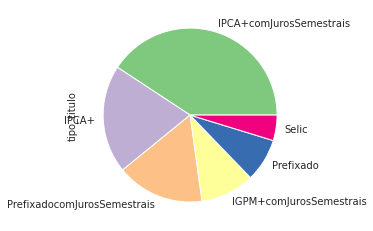

In [133]:
aux = df['tipo_titulo'].value_counts().plot.pie()

In [134]:
print('Para ter uma ideia, esses dados vao temporalmente  de \n',df.data_base.unique().min(),' a ', df.data_base.unique().max())

Para ter uma ideia, esses dados vao temporalmente  de 
 2004-12-31T00:00:00.000000000  a  2021-12-07T00:00:00.000000000


In [135]:
print('Em questão de Datas de Vencimento esses dados vao temporalmente de \n',df.data_vencimento.unique().min(),' a ', df.data_vencimento.unique().max())

Em questão de Datas de Vencimento esses dados vao temporalmente de 
 2022-01-01T00:00:00.000000000  a  2055-05-15T00:00:00.000000000


In [136]:
def plotar(titulo, labelx, labely, x, y , dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x,y=y,data=dataset)
  ax.figure.set_size_inches(20,10)
  ax.set_title(titulo,loc='left',fontsize=18)
  ax.set_xlabel(labelx,fontsize=14)
  ax.set_ylabel(labely,fontsize=14)
  ax = ax

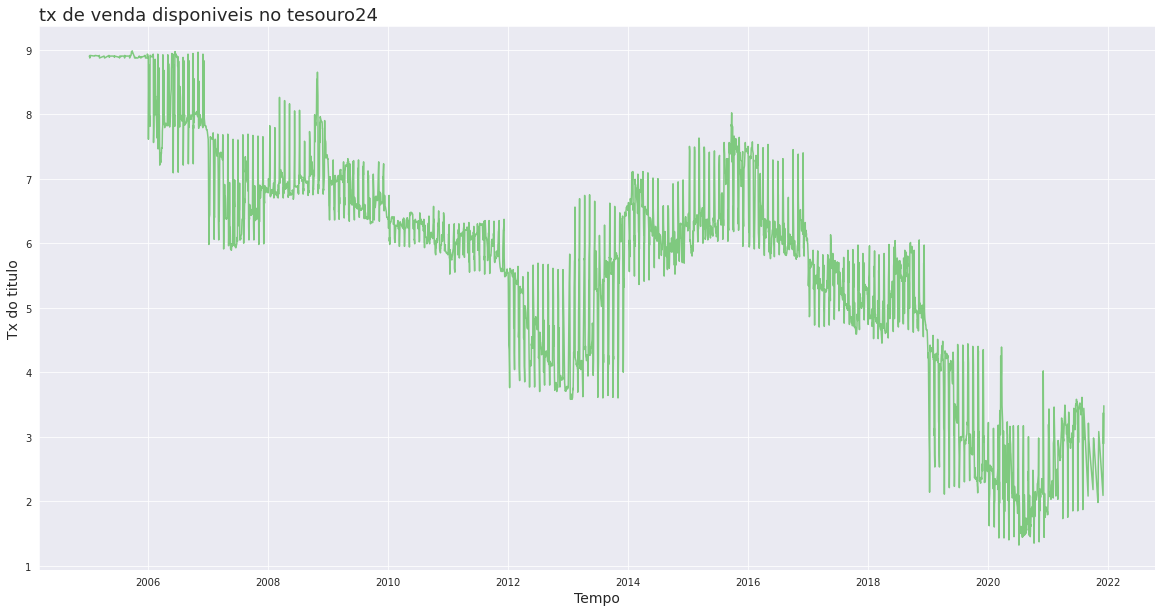

In [137]:
plotar('tx de venda disponiveis no tesouro24','Tempo','Tx do titulo','data_base','taxa_venda_manha',df_ipca24);



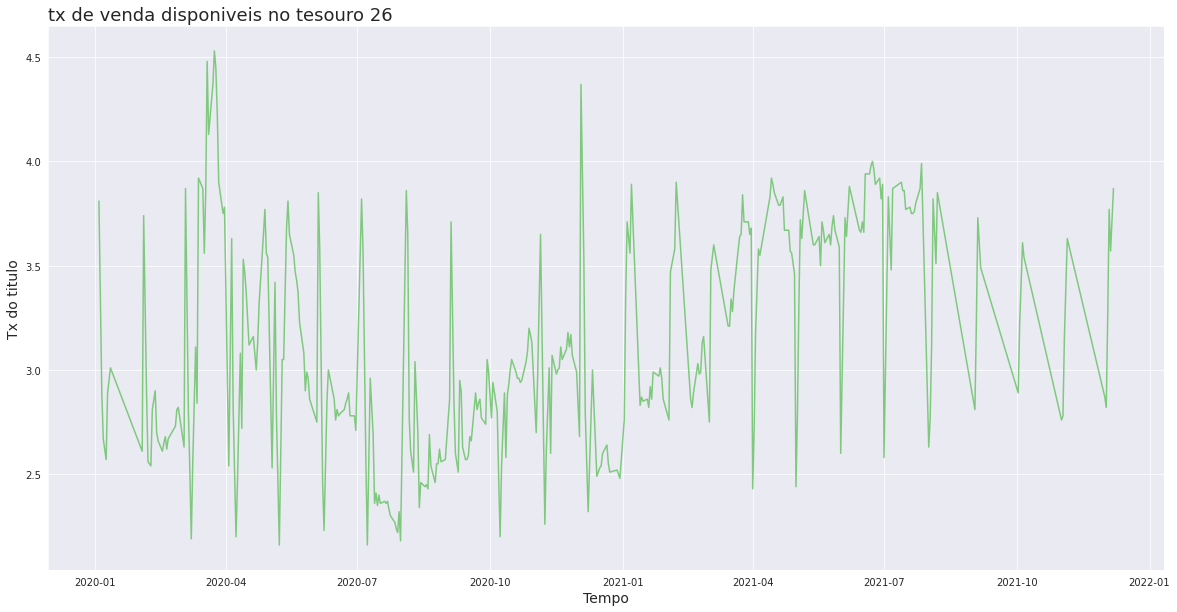

In [138]:
plotar('tx de venda disponiveis no tesouro 26','Tempo','Tx do titulo','data_base','taxa_venda_manha',df_ipca26);

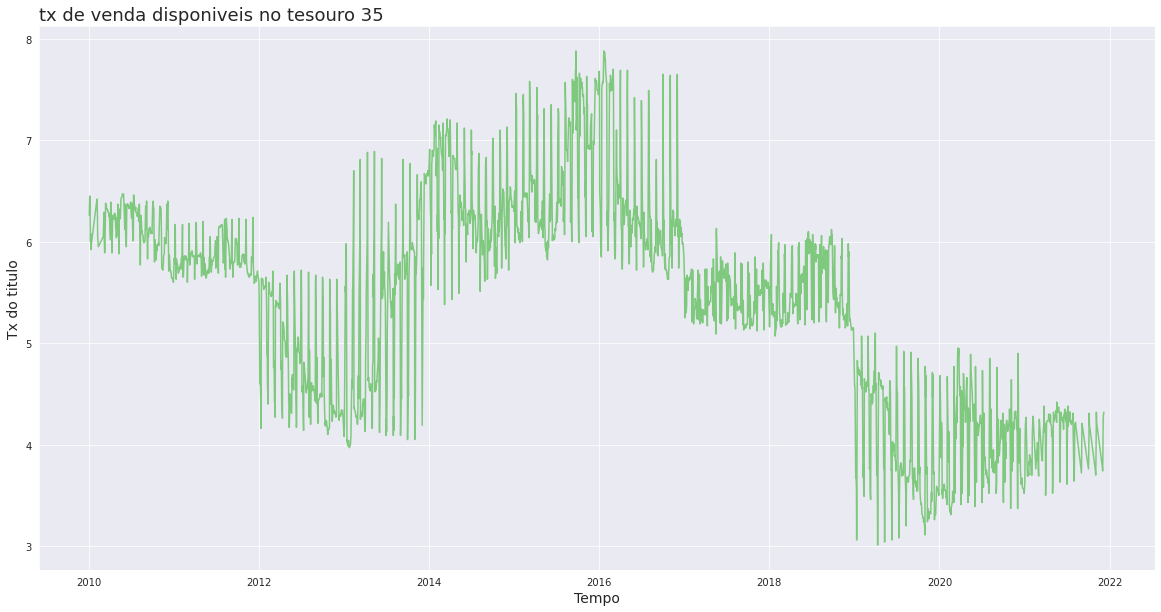

In [139]:
plotar('tx de venda disponiveis no tesouro 35','Tempo','Tx do titulo','data_base','taxa_venda_manha',df_ipca35);

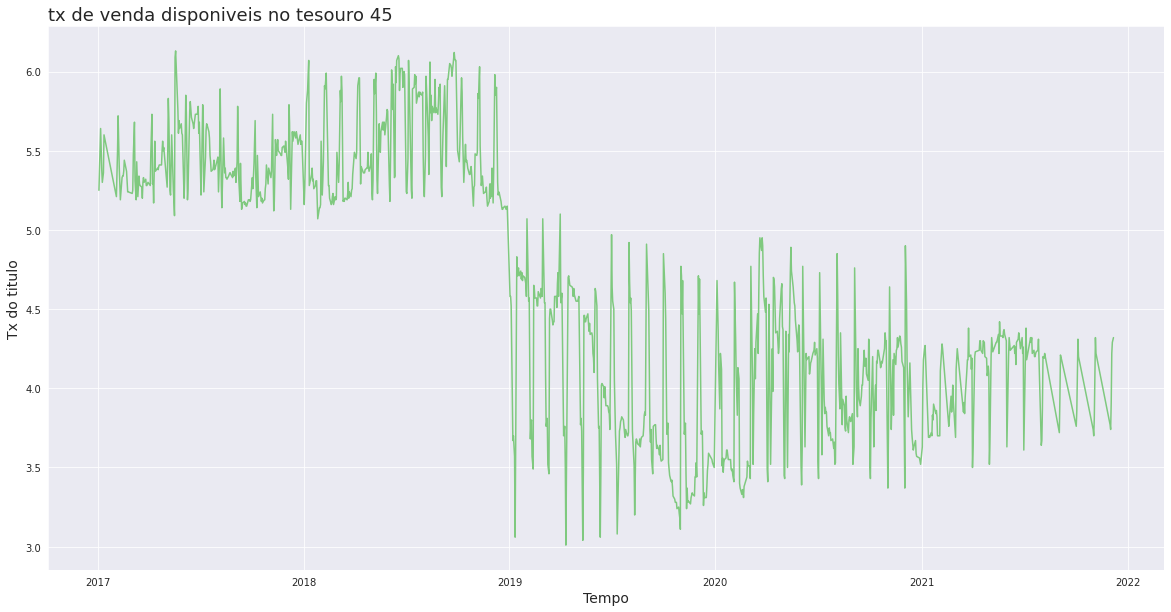

In [140]:
plotar('tx de venda disponiveis no tesouro 45','Tempo','Tx do titulo','data_base','taxa_venda_manha',df_ipca45);

Vamos realizar os mesmo graficos do preço agora !

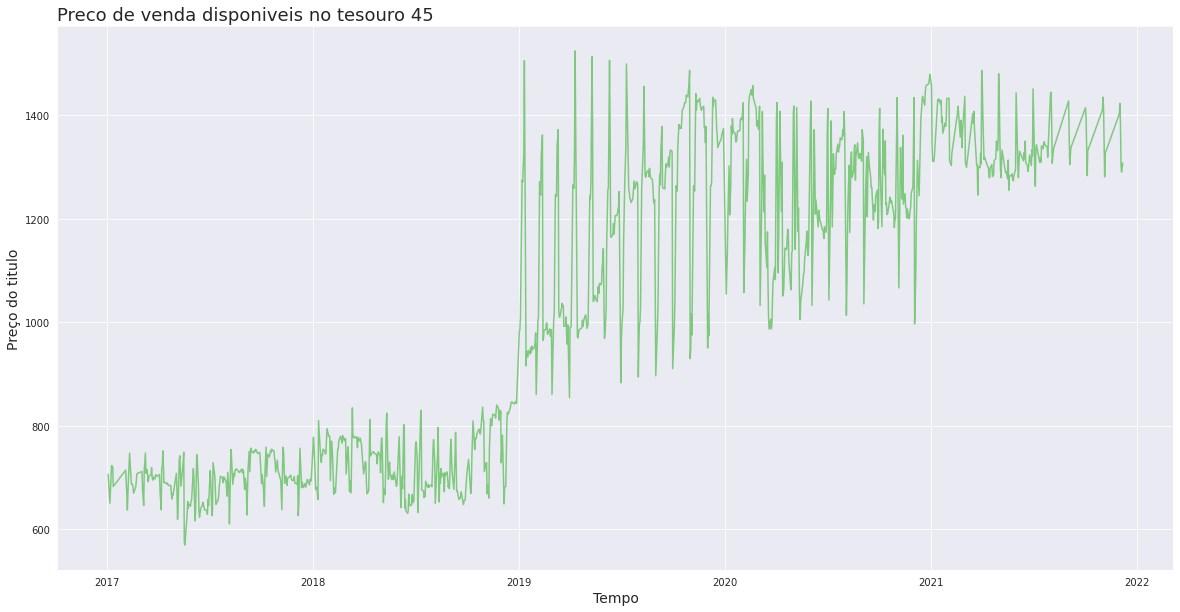

In [141]:
plotar('Preco de venda disponiveis no tesouro 45','Tempo','Preço do titulo','data_base','pu_venda_manha',df_ipca45);

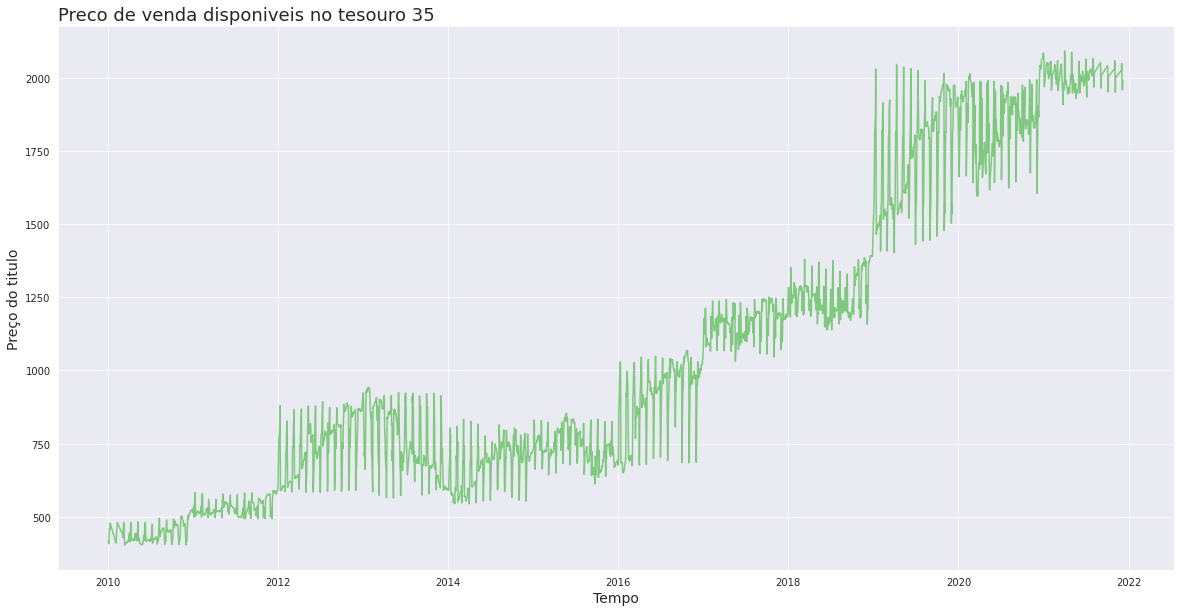

In [142]:
plotar('Preco de venda disponiveis no tesouro 35','Tempo','Preço do titulo','data_base','pu_venda_manha',df_ipca35);

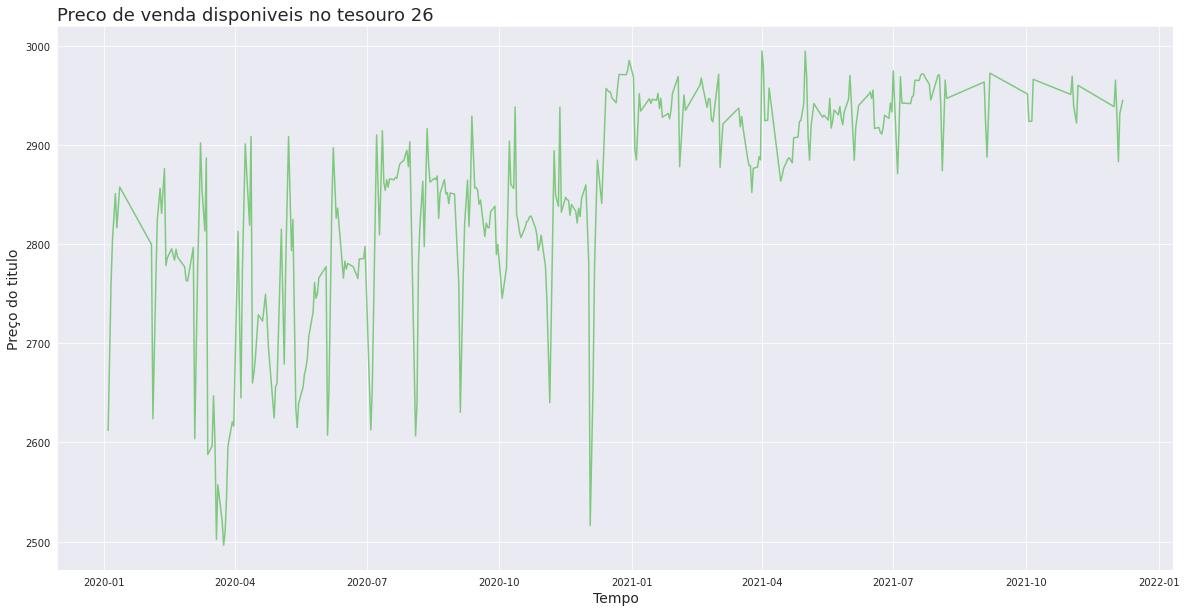

In [143]:
plotar('Preco de venda disponiveis no tesouro 26','Tempo','Preço do titulo','data_base','pu_venda_manha',df_ipca26);

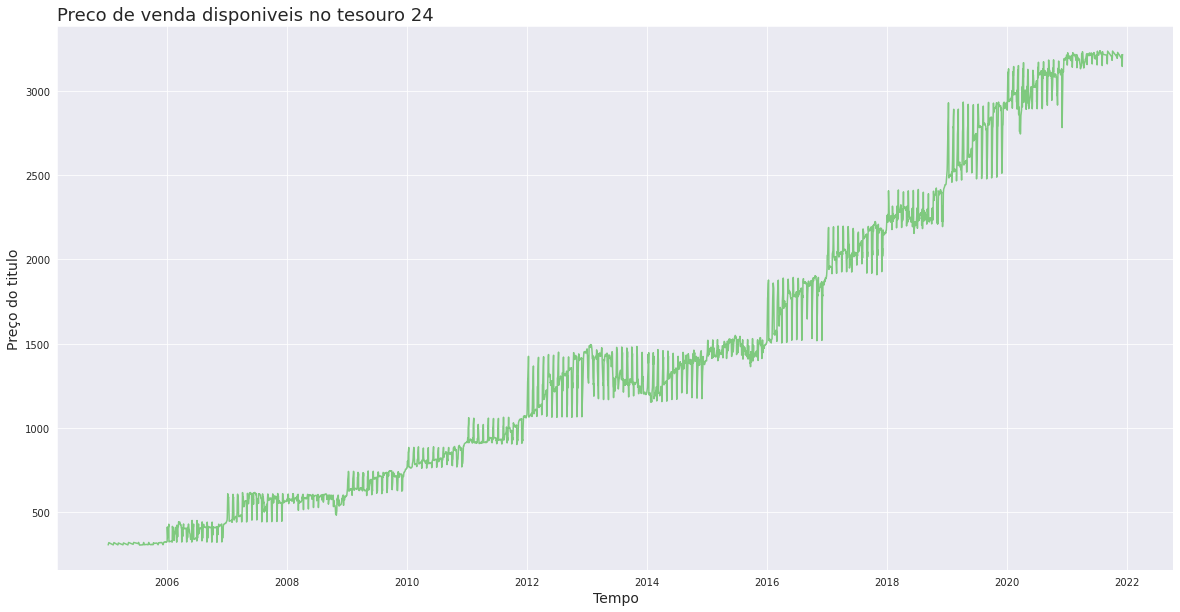

In [144]:
plotar('Preco de venda disponiveis no tesouro 24','Tempo','Preço do titulo','data_base','pu_venda_manha',df_ipca24);

**reflexão**

*Apenas como primeiro contato com os dados*

Como podemos ver, temos grande difereça entre os conjutos de dados agrupados apenas por Titulos do Tesouro, o 24, que não se apresenta mais disponivel, o 26 que podemos conseiderar um Bebe, com apenas um ano, e os outros dois mais velhos, os quais possuim mais dados mais ainda assim possuim uma grande diferença entre eles;

Inicialmente(ainda)não tomamos muitos cuidades para a analise;

para melhor faze-lo poderiamos usar a função seguinte


In [145]:
def plot_comparacao(x,y1,y2,title,dataset):
  plt.figure(figsize=(22,11))
  ax =plt.subplot(2,1,1)
  ax.set_title(title, fontsize=18,loc='left')
  sns.lineplot(x=x,y=y1,data =dataset)
  plt.subplot(2,1,2)
  sns.lineplot(x=x,y=y2,data =dataset)
  ax=ax

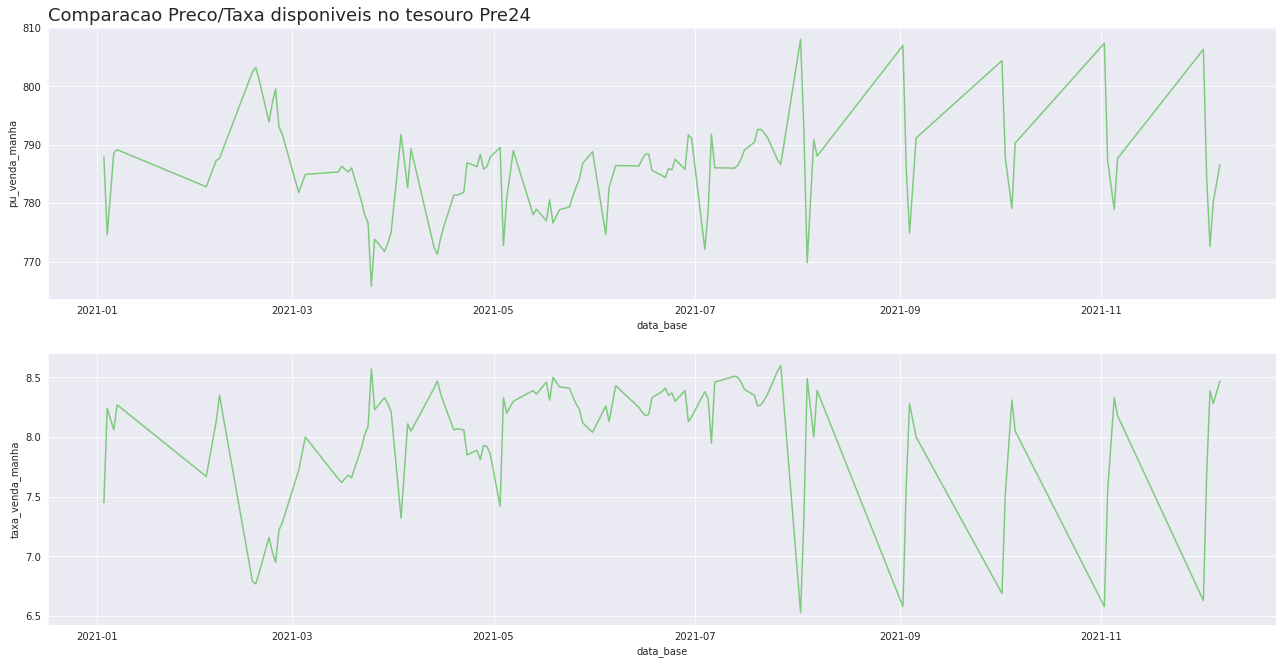

In [146]:
plot_comparacao('data_base','pu_venda_manha','taxa_venda_manha','Comparacao Preco/Taxa disponiveis no tesouro Pre24',df_pre24)

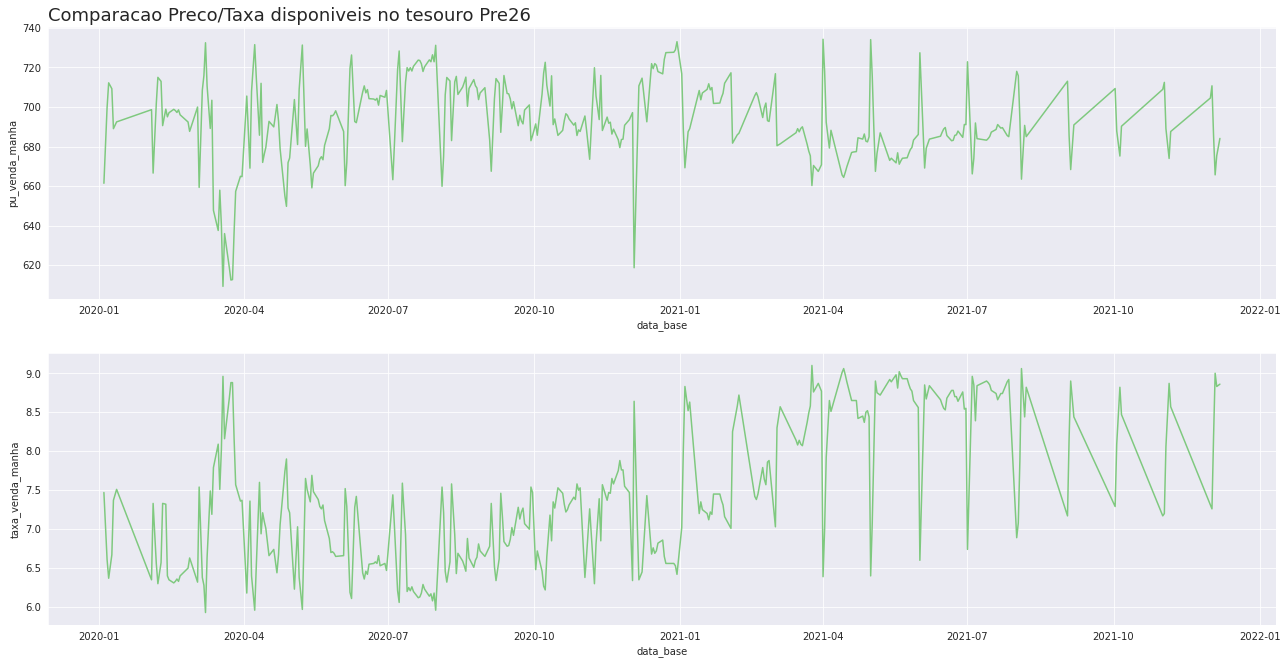

In [147]:
plot_comparacao('data_base','pu_venda_manha','taxa_venda_manha','Comparacao Preco/Taxa disponiveis no tesouro Pre26',df_pre26)

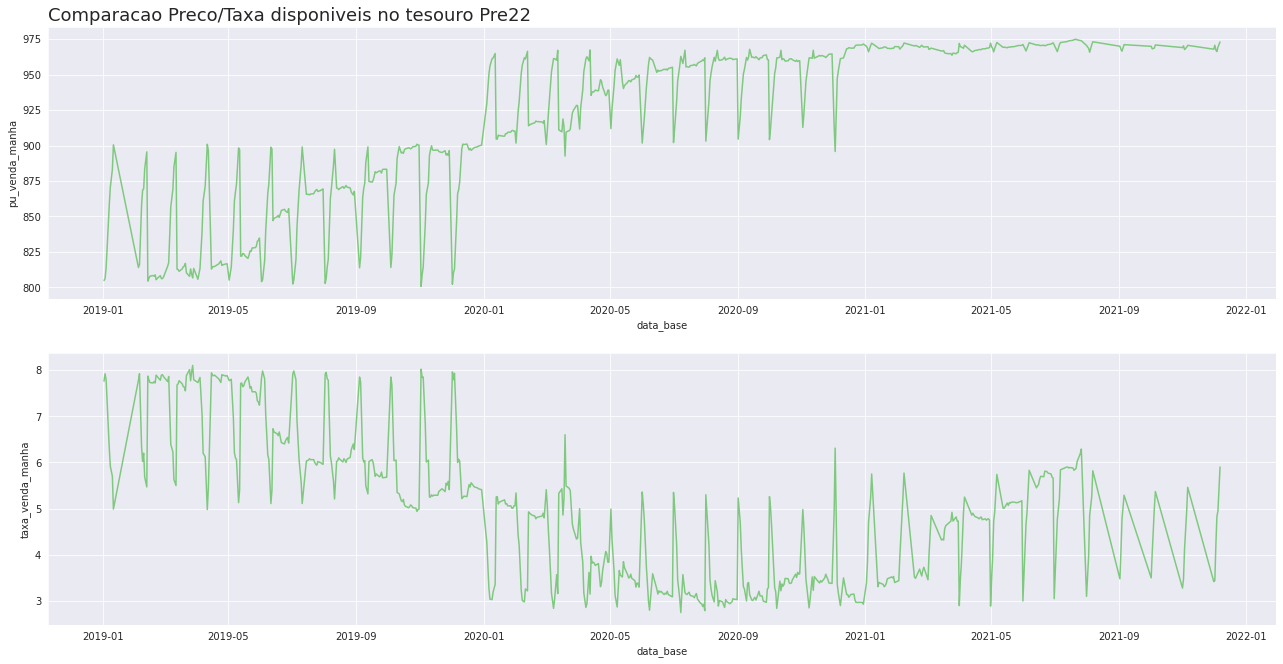

In [148]:
plot_comparacao('data_base','pu_venda_manha','taxa_venda_manha','Comparacao Preco/Taxa disponiveis no tesouro Pre22',df_pre22)

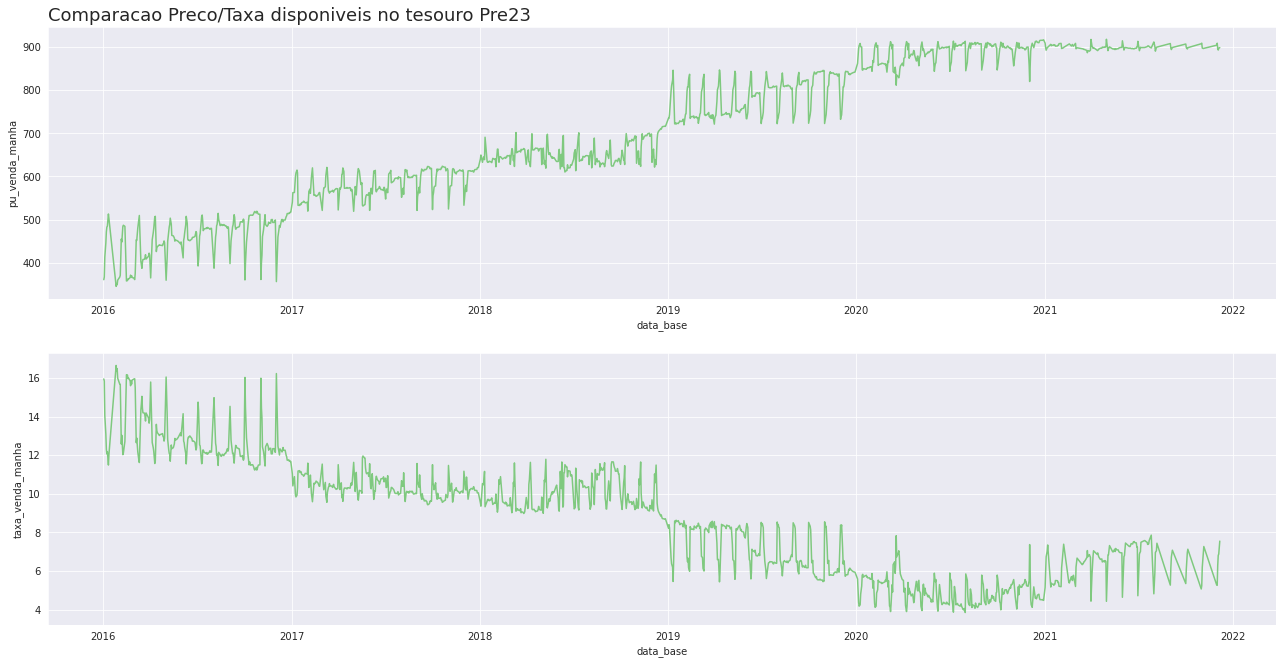

In [149]:
plot_comparacao('data_base','pu_venda_manha','taxa_venda_manha','Comparacao Preco/Taxa disponiveis no tesouro Pre23',df_pre23)

,tipo_titulo,data_vencimento,data_base,taxa_compra_manha,taxa_venda_manha,pu_compra_manha,pu_venda_manha,pu_base_manha
0,IGPM+comJurosSemestrais,2006-01-12,2005-01-14,9.38,9.40,1807.03,1806.44,1804.74
1,IGPM+comJurosSemestrais,2008-01-04,2005-01-14,9.05,9.09,1696.11,1694.32,1692.74
2,IGPM+comJurosSemestrais,2011-01-03,2005-01-14,8.36,8.42,1655.03,1650.44,1648.94
3,IGPM+comJurosSemestrais,2017-01-07,2005-01-14,8.26,8.34,1509.54,1500.05,1498.69
4,IGPM+comJurosSemestrais,2021-01-04,2005-01-14,8.26,8.34,1490.02,1479.39,1478.05
